<a id = 'setup'></a>

## Set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import warnings      # ignore warnings
warnings.filterwarnings('ignore')

In [3]:
credit = pd.read_csv('creditcard.csv')

<a id = 'epd'></a>

## Explore and Prepare data 
<ul>
    <li><b>Train_test_split: </b>we'll split our dataset into train, test set and Validation set.</li><br>
    <li><b>Scaling: </b> Perform Feature Scaling on Amount and Time Columns as the rest columns has already been scaled, so we do need to scale them again </li><br>
    <li><b>Class imbalance: </b>Next,  we'll check for class imbalance and perform undersampling/oversampling to balance our class (50:50 ratio). <br> 
</ul><br>
<b>Note: </b>Due to privacy issues, we don't know what the other features are (V1 - V28) .</li>

In [4]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
X = credit.drop(['Class'], axis = 1)
y = credit['Class']

<a id = 'sd'></a>

## Splitting data - train, test, validation

In [7]:
# Splitting train and test set in equal proportion (80:20 ratio)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(X, y):
    X_strat_train = X.loc[train_index]
    X_strat_test = X.loc[test_index]
    y_train = y.loc[train_index]
    y_test = y.loc[test_index]

In [8]:
# Splitting train and Validation set (80:20 ratio)

split = StratifiedShuffleSplit(n_splits = 1, train_size = 0.8, random_state = 42)
for train_index, validation_index in split.split(X_strat_train, y_train):
    X_strat_train = X.loc[train_index]
    X_strat_validation = X.loc[validation_index]
    y_train = y.loc[train_index]
    y_validation = y.loc[validation_index]

<a id = 'Setup'></a>

In [9]:
# proportion of classes in train set

y_train.value_counts()/len(y_train)

0    0.998168
1    0.001832
Name: Class, dtype: float64

In [10]:
# proportion of classes in test set

y_test.value_counts()/len(y_test)

0    0.99828
1    0.00172
Name: Class, dtype: float64

In [11]:
# proportion of classes in validation set

y_validation.value_counts()/len(y_validation)

0    0.998179
1    0.001821
Name: Class, dtype: float64

In [12]:
print('Size of Validation set',y_validation.shape)
print('Size of Test set', y_test.shape)
print('Size of Train set', y_train.shape)

Size of Validation set (45569,)
Size of Test set (56962,)
Size of Train set (182276,)


In [13]:
# make a copy of dataframe

X_train = X_strat_train.copy()
X_test = X_strat_test.copy()
X_validation = X_strat_validation.copy()

No of Non Fraudulent Transactions:  181942
No of Fraudulent Transactions:  334


<Axes: ylabel='count'>

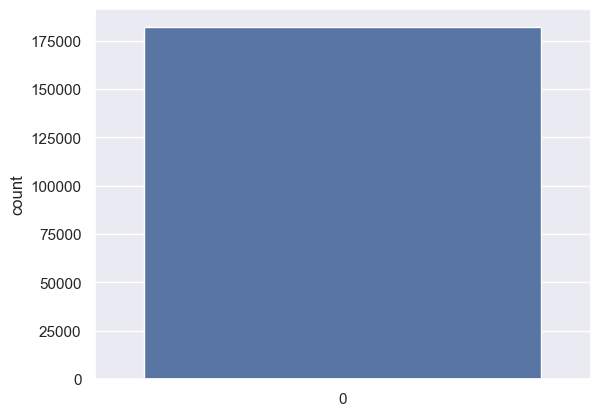

In [14]:
# Class imbalance

df = pd.concat([X_train, y_train], axis = 1)
print('No of Non Fraudulent Transactions: ', len(df.loc[df.Class == 0]))
print('No of Fraudulent Transactions: ', len(df.loc[df.Class == 1]))

sns.countplot(df.Class)

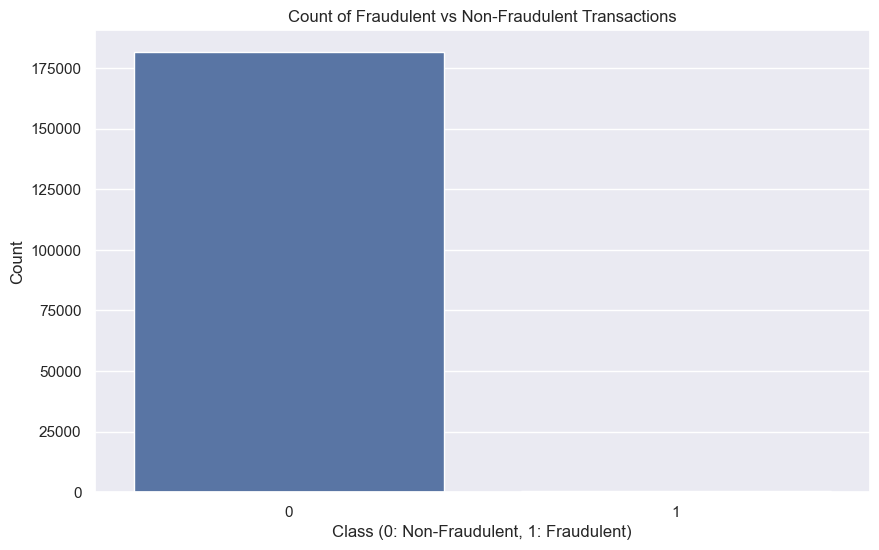

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your dataframe that contains the transaction class information

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df)
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

<Axes: >

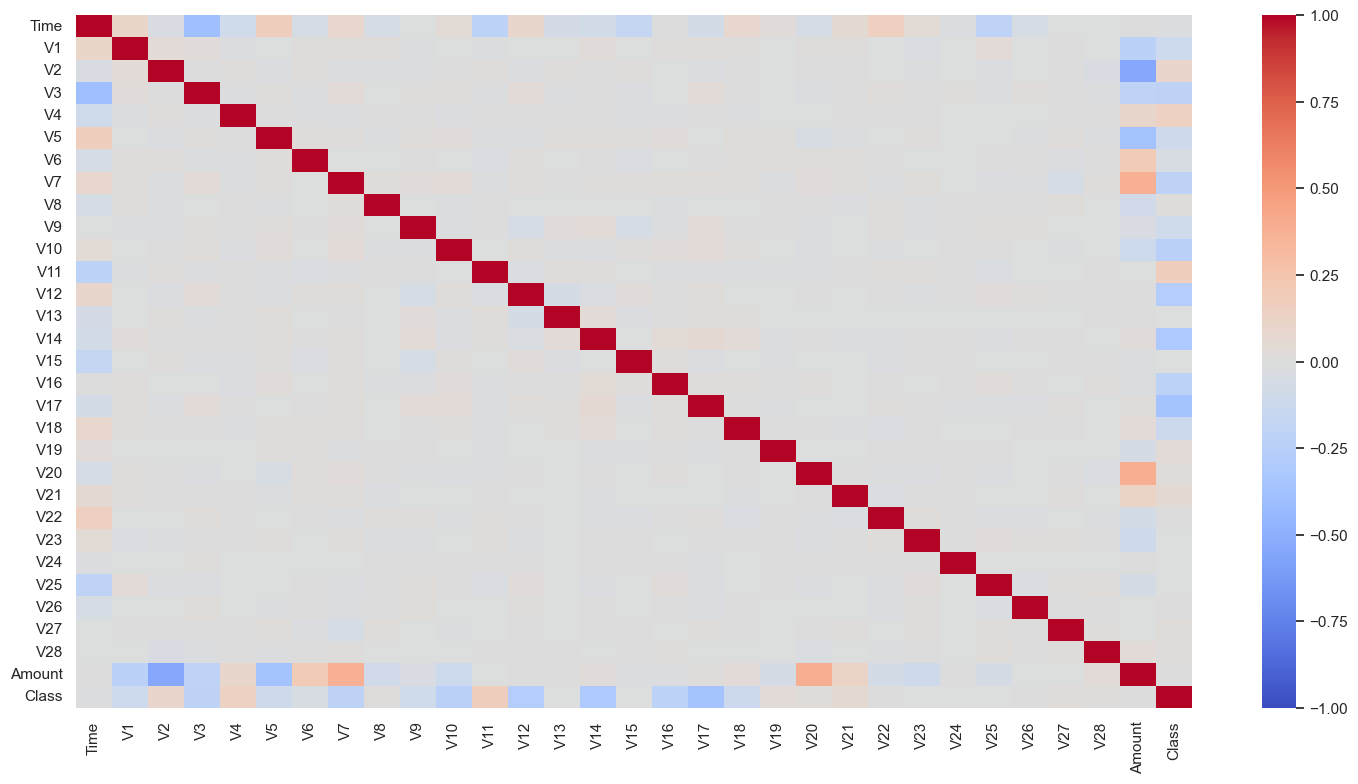

In [15]:
# plot correlation matrix

corr_matrix = df.corr()
plt.figure(figsize = (18, 9))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [16]:
# Correlations with labels

corr_matrix.Class.sort_values(ascending = False)

Class     1.000000
V11       0.165494
V4        0.137693
V2        0.100242
V21       0.052034
V19       0.038386
V27       0.021062
V20       0.017704
V8        0.015440
V28       0.009031
Amount    0.004786
V26       0.000546
V22       0.000467
V25      -0.000684
V13      -0.001646
V23      -0.003444
V15      -0.005866
V24      -0.007756
Time     -0.013098
V6       -0.044186
V9       -0.101438
V5       -0.109178
V1       -0.111857
V18      -0.128889
V7       -0.214055
V3       -0.215121
V16      -0.219037
V10      -0.238518
V12      -0.269756
V14      -0.313362
V17      -0.362884
Name: Class, dtype: float64

## Outliers

<a id = 'o'></a>

<b>Note: </b>We cannot remove every outliers, otherwise we'll loose some important data. so, we'll try to remove few of them from those features which are highly correlated with our labels.

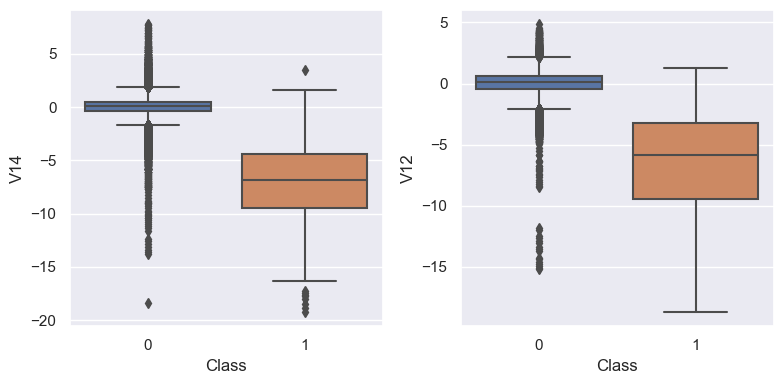

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4))

sns.boxplot(x = 'Class', y = 'V14', data = df, ax = ax1)
sns.boxplot(x = 'Class', y = 'V12', data = df, ax = ax2)

plt.tight_layout()

In [18]:
# Removing Outliers with IQR for Fraudulent Transactions(Class = 1)

V14_fraud = df['V14'].loc[df['Class'] == 1]

q25, q75 = np.percentile(V14_fraud, 25), np.percentile(V14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {} \n'.format(q25, q75))

V14_iqr = q75 - q25
print('V14 IQR : {}\n'.format(V14_iqr))

cutoff = V14_iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff

outliers = [x for x in V14_fraud if x < lower or x > upper]
print('V14 Outliers: {}\n'.format(outliers))
print('No of Outliers for V14: {}\n'.format(len(outliers)))

df = df.drop(df[(df['V14'] > upper) | (df['V14'] < lower)].index)

print('-' * 127)
print()

V12_fraud = df['V12'].loc[df['Class'] == 1]

q25, q75 = np.percentile(V12_fraud, 25), np.percentile(V12_fraud, 75)
print('Quartile 25: {} | Quartile 75: {} \n'.format(q25, q75))

V12_iqr = q75 - q25
print('V12 IQR : {}\n'.format(V12_iqr))

cutoff = V12_iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff

outliers = [x for x in V12_fraud if x < lower or x > upper]
print('V12 Outliers: {}\n'.format(outliers))
print('No of Outliers for V12: {}\n'.format(len(outliers)))

df = df.drop(df[(df['V12'] > upper) | (df['V12'] < lower)].index)

Quartile 25: -9.495390400062472 | Quartile 75: -4.370124497352183 

V14 IQR : 5.125265902710289

V14 Outliers: [-18.4937733551053, 3.44242199594215, -17.230202160711, -18.8220867423816, -17.6206343516773, -19.2143254902614, -18.0499976898594, -17.7216383537133, -17.4759212828566]

No of Outliers for V14: 9

-------------------------------------------------------------------------------------------------------------------------------

Quartile 25: -8.95219071159749 | Quartile 75: -3.19191476820242 

V12 IQR : 5.7602759433950705

V12 Outliers: [-18.5536970096458, -18.0475965708216, -18.6837146333443]

No of Outliers for V12: 3



In [19]:
# training set after removing outliers

X_train = df.drop(['Class'], axis = 1)
y_train = df['Class']

No of Non Fraudulent Transactions:  181639
No of Fraudulent Transactions:  322


<Axes: ylabel='count'>

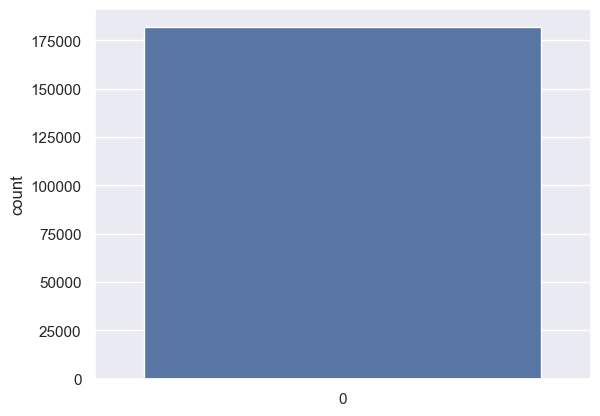

In [20]:
# Class imbalance

print('No of Non Fraudulent Transactions: ', len(df.loc[df.Class == 0]))
print('No of Fraudulent Transactions: ', len(df.loc[df.Class == 1]))

sns.countplot(df.Class)

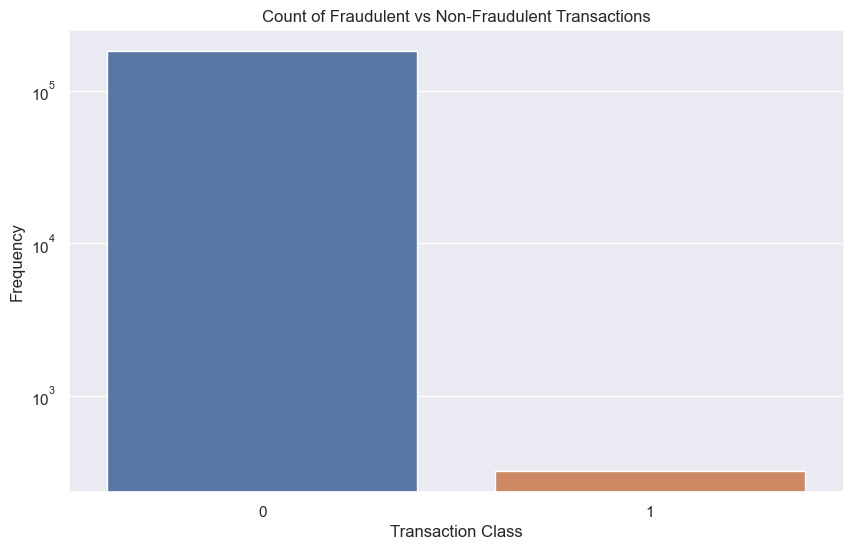

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe containing the 'Class' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df)
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Transaction Class')
plt.ylabel('Frequency')
plt.yscale('log')  # Using a logarithmic scale due to class imbalance
plt.show()


<a id = 'ru'></a>

## Random undersampling
<ul>
    <li>We neither <b>Removed outliers nor performed random undersamping on Validation set as well as test set</b> because we want to check our model performance on natural dataset. So, class imbalanced and outliers still exist in  Validation set as well as test set.</li><br>
    <li>Also there is huge difference in minority and majority Class, we might face the problem of <b>loosing our information by performing Undersampling</b> on our data.</li>

</ul>

In [21]:


from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print('Classes before Sampling: {}'.format(Counter(y_train)))

under = RandomUnderSampler(random_state = 42, sampling_strategy = 'majority')
X_train, y_train = under.fit_resample(X_train, y_train)

print('Classes before Sampling: {}'.format(Counter(y_train)))

Classes before Sampling: Counter({0: 181639, 1: 322})
Classes before Sampling: Counter({0: 322, 1: 322})


In [22]:
# Feature Scaling 
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
                       ('Scaler', RobustScaler(), ['Amount', 'Time'])], 
                        remainder = 'passthrough' 
                       )

X_train = ct.fit_transform(X_train)
X_test = ct.fit_transform(X_test)
X_validation = ct.fit_transform(X_validation)

<a id = 'tm'></a>

## Select and train the Models

In [23]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver = 'lbfgs')
log_reg.fit(X_train, y_train)

LogisticRegression()

In [24]:
# Cross validations scores on train test to plot ROC AUC Curves
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

y_scores_log = cross_val_predict(log_reg, X_validation, y_validation, cv = 3, method = 'decision_function')
fpr_log, tpr_log, thresholds_log = roc_curve(y_validation, y_scores_log)

In [25]:
# Support Vector Machines
from sklearn.svm import SVC

svm_clf = SVC(probability = True, random_state = 42)

svm_clf.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [26]:
# Cross validations scores on train test to plot ROC AUC Curves

y_scores_svm = cross_val_predict(svm_clf, X_validation, y_validation, cv = 3, method = 'decision_function')
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_validation, y_scores_svm)

<b>Note: </b>Ensemble algorithms do not have <b>'Decision Function method'</b>, so we'll be using <b>positive Class probabilities as y_scores to plot ROC curves</b>. Also we are cross validating on validation set so that we can have an exact estimate of our model perfomance on test set.

In [27]:
# decision tress
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state = 42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
# Cross validations scores on train test to plot ROC AUC Curves

y_scores_dt = cross_val_predict(dt_clf, X_validation, y_validation, cv = 3, method = 'predict_proba')[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_validation, y_scores_dt)

In [29]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state = 42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Cross validations scores on train test to plot ROC AUC Curves

y_scores_rf = cross_val_predict(rf_clf, X_validation, y_validation, cv = 3, method = 'predict_proba')[:, 1] 
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_validation, y_scores_rf)

In [32]:
# XGBoost 
#!pip install xgboost

from xgboost.sklearn import XGBClassifier

xgb_clf = XGBClassifier(random_state = 42)
xgb_clf.fit(X_train, y_train)

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/76/e8/260752c1bc8dc856b27cfefaa3fca29ba02a15f649bbf6e9c15ed54e5480/xgboost-2.0.2-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.0 MB/s eta 0:00:00a 0:00:01


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [33]:
# Cross validations scores on train test to plot ROC AUC Curves

y_scores_xgb = cross_val_predict(xgb_clf, X_validation, y_validation, cv = 3, method = 'predict_proba')[:, 1] 
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_validation, y_scores_xgb)

In [34]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
                              estimators = [ ('xgb', xgb_clf), ('lr', log_reg), ('svm', svm_clf), ('rf', rf_clf)],
                              voting = 'soft'
                              )

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('lr', LogisticRegression()),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42))],
                 voting='soft')

In [35]:
y_scores_voting = cross_val_predict(voting_clf, X_validation, y_validation, cv = 3, method = 'predict_proba')[:, 1]
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_validation, y_scores_voting)

<ul>
    <li><b>Voting = 'Soft'</b> means it will predict the class with highest class probability by <b> by averaging over all the individual classifiers</b></li>

<a id = 'roc'></a>

## ROC Curves

In [36]:
# plot ROC curve

def plot_roc_curve(fpr, tpr, label=None, linestyle = None):
    plt.plot(fpr, tpr, linewidth=2, label=label, linestyle = linestyle)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)
    
    plt.legend(loc="lower right", fontsize=16)

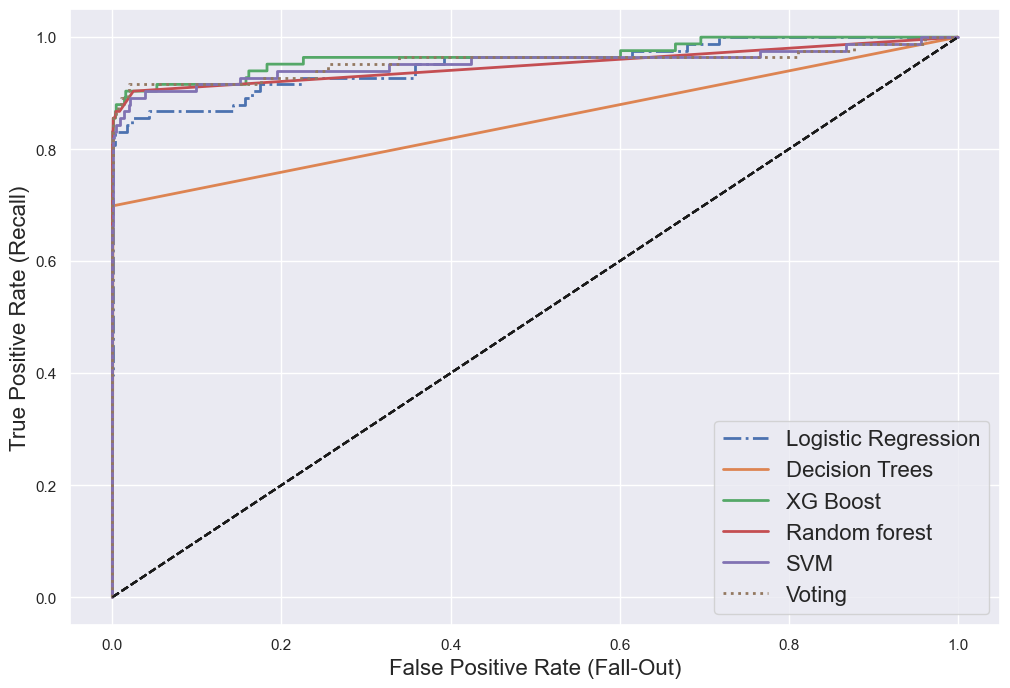

In [37]:
# plot ROC Curves

plt.figure(figsize=(12, 8))                                  
plot_roc_curve(fpr_log, tpr_log, label = 'Logistic Regression', linestyle = '-.')
plot_roc_curve(fpr_dt, tpr_dt, label = "Decision Trees")
plot_roc_curve(fpr_xgb, tpr_xgb, label = "XG Boost")
plot_roc_curve(fpr_rf, tpr_rf, label = "Random forest")
plot_roc_curve(fpr_svm, tpr_svm, label = "SVM")
plot_roc_curve(fpr_voting, tpr_voting, label = "Voting", linestyle = ':')

plt.legend(loc="lower right", fontsize=16)

In [38]:
# Roc auc scores
from sklearn.metrics import roc_auc_score

print('roc_auc_scores')
print()
print('SVM : ', roc_auc_score(y_validation, y_scores_svm))
print('Decision trees : ', roc_auc_score(y_validation, y_scores_dt))
print('Logistic Regression : ', roc_auc_score(y_validation, y_scores_log))
print('XGBoost : ', roc_auc_score(y_validation, y_scores_xgb))
print('Random Forest: ', roc_auc_score(y_validation, y_scores_rf))
print('Voting Classifier:', roc_auc_score(y_validation, y_scores_voting))

roc_auc_scores

SVM :  0.9530103000049268
Decision trees :  0.8490348413837384
Logistic Regression :  0.9507540781779009
XGBoost :  0.9664117490937235
Random Forest:  0.9498828979021217
Voting Classifier: 0.9551195151268574


### Look Voting classifier and XGBoost has performed better than rest 

<a id = 'ft'></a>

## Fine tuning XGBoost

In [39]:
# plots for hyperparamter tunings

scores1, scores2 = [], []

estimators = [int(i) for i in range(300, 900, 20)]
max_depths = [i for i in range(1, 15)]

for i in estimators:
    xgb_clf = XGBClassifier(n_estimators = i)
    xgb_clf.fit(X_train, y_train)
    y_pred = xgb_clf.predict_proba(X_validation)[:, 1]
    score = roc_auc_score(y_validation, y_pred)
    scores1.append(score)

for i in max_depths:
    xgb_clf = XGBClassifier(n_estimators = 600, max_depth = i)
    xgb_clf.fit(X_train, y_train)
    y_pred = xgb_clf.predict_proba(X_validation)[:, 1]
    score = roc_auc_score(y_validation, y_pred)
    scores2.append(score)

Text(0, 0.5, 'roc_auc score')

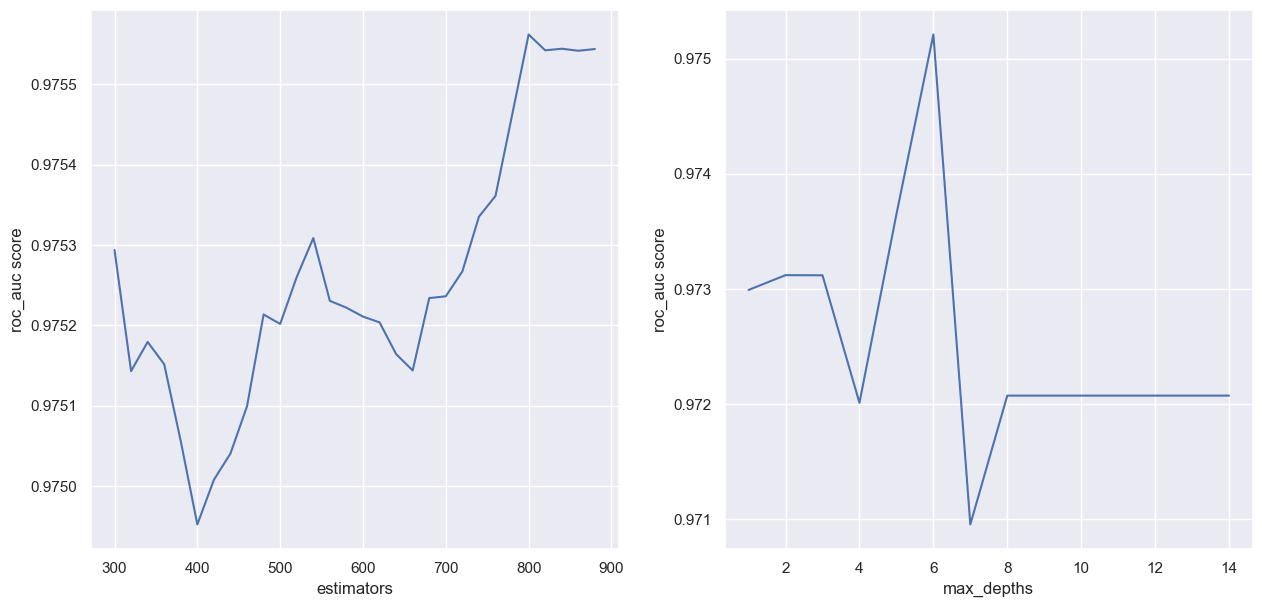

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7))

ax1.plot(estimators, scores1)
ax1.set_xlabel('estimators') ; ax1.set_ylabel('roc_auc score')
ax2.plot(max_depths, scores2)
ax2.set_xlabel('max_depths') ; ax2.set_ylabel('roc_auc score')

Like Above, you can plot the graphs and select the best hyperparameter values by looking at the best roc_auc score. <ul>
    <li> <b>After 600 estimators</b> the roc_auc score started decreasing as the model tends to start overfitting. so our value of <b>n_estimators is 600</b></li></ul>

In [41]:
xgb_clf_fine_tuned = XGBClassifier(n_estimators = 600, max_depth = 3, eta = 0.01, 
                        subsample = 0.8, colsample_bytree = 0.6, gamma = 2.5,
                        min_child_weight = 1.6, random_state = 42)

xgb_clf_fine_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None,
              feature_types=None, gamma=2.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1.6, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=600,
              n_jobs=None, num_parallel_tree=None, ...)

<a id = 'testset'></a>

## Evaluating XGBoost on test set

In [42]:
# roc_auc score on test set

y_scores_tuned = xgb_clf_fine_tuned.predict_proba(X_test)[:,1]  # Scores on positive class
y_scores = xgb_clf.predict_proba(X_test)[:, 1]

print('roc_auc score Before fine tuning', roc_auc_score(y_test, y_scores))
print('roc_auc score After fine tuning', roc_auc_score(y_test, y_scores_tuned))

roc_auc score Before fine tuning 0.9907128932045525
roc_auc score After fine tuning 0.992088714354622


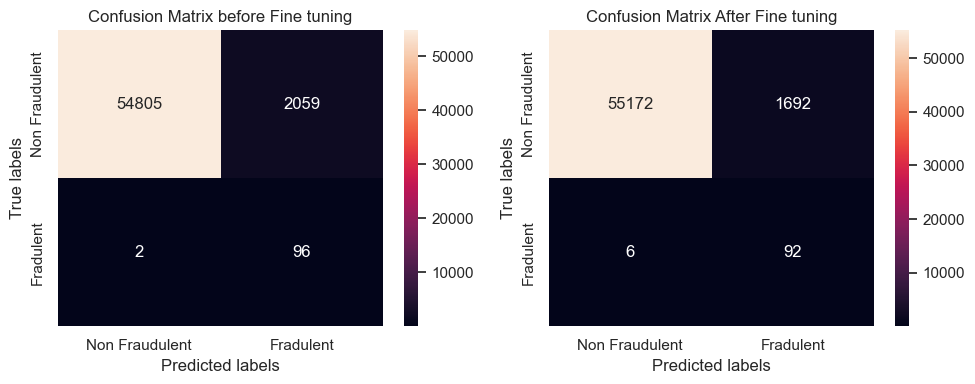

In [43]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, xgb_clf.predict(X_test))
cnf_matrix_tuned = confusion_matrix(y_test, xgb_clf_fine_tuned.predict(X_test))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
sns.heatmap(cnf_matrix, annot=True, ax = ax1 , fmt = 'g')
sns.heatmap(cnf_matrix_tuned, annot=True, ax = ax2 , fmt = 'g')

# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels') 
ax1.set_title('Confusion Matrix before Fine tuning')
ax1.xaxis.set_ticklabels(['Non Fraudulent', 'Fradulent']); ax1.yaxis.set_ticklabels(['Non Fraudulent', 'Fradulent'])
ax2.set_xlabel('Predicted labels'); ax2.set_ylabel('True labels') 
ax2.set_title('Confusion Matrix After Fine tuning')
ax2.xaxis.set_ticklabels(['Non Fraudulent', 'Fradulent']); ax2.yaxis.set_ticklabels(['Non Fraudulent', 'Fradulent'])
plt.tight_layout()

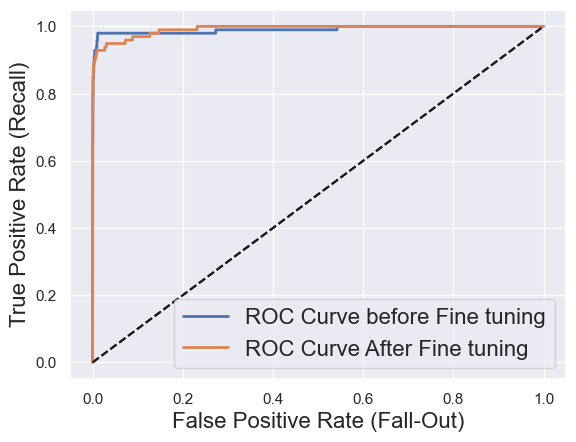

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, y_scores_tuned)

plot_roc_curve(fpr, tpr, label = "ROC Curve before Fine tuning")
plot_roc_curve(fpr_tuned, tpr_tuned, label = "ROC Curve After Fine tuning")

plt.legend(loc="lower right", fontsize=16)

Unlike before, Now our model is predicting Scores with highest Recall as well as Precision score as it is touching <b>100 % TPR with only 20% Fall out</b>. Additionally, it is <b>generalize enough on test Set and not overfitting like before.</b>

<a id = 'summ'></a>

## Summary:
<ul>
    <li><b>Never perform Cross validation on Oversampling data</b> otherwise your model would tend to overfit. Moreover, if you undersample a large majority Class into fewer samples, you might loose information of data.</li>
    <li>There is always going to be a <b>trade off between TPR, FPR as well as Recall/Precision</b>, Choose wisely based on your need.</li>
    <li>Also i believe that, if you fine tune the Rest Classifiers, and used them under<b> Voting Classifier</b> to predict,  you might get 100 % roc_auc_score.